<a href="https://colab.research.google.com/github/valeriocardoso/learning-area/blob/master/Machine_Learning/Feature_Engineering/tsfresh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tsfresh

     |████████████████████████████████| 92kB 2.4MB/s 
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=6e1604d3cff43b12df4cc11178331cc9a7327981db957dde1868ea3e77cf347e
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built locket


In [2]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures,\
                                                      load_robot_execution_failures

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [5]:
timeseries.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


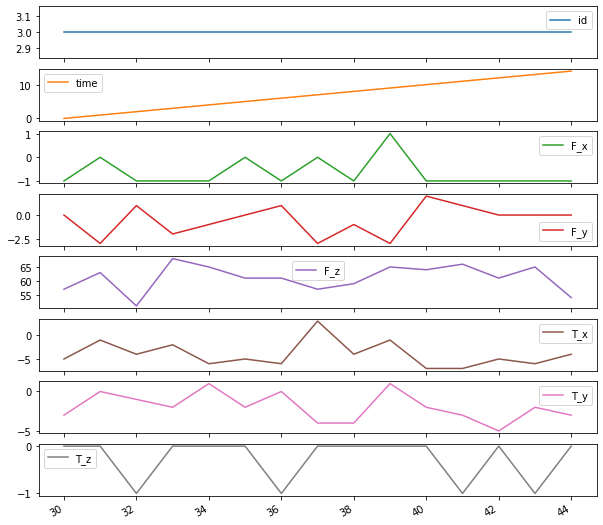

In [8]:
import matplotlib.pyplot as plt
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

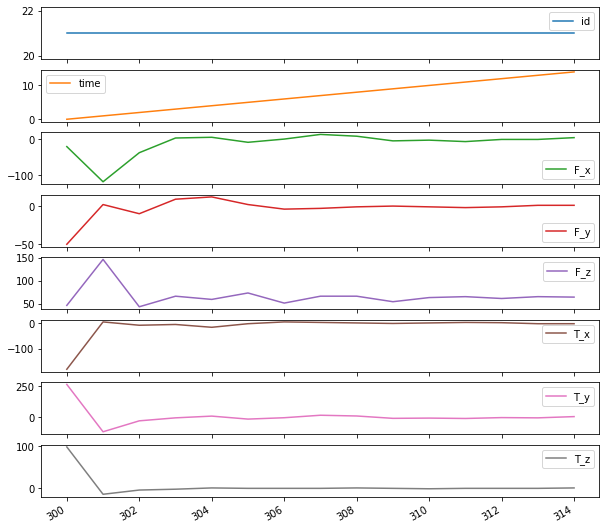

In [9]:
timeseries[timeseries['id'] == 21].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [10]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 5/5 [00:24<00:00,  4.82s/it]


In [18]:
extracted_features.head()

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""__maxlag_40","F_x__agg_autocorrelation__f_agg_""median""__maxlag_40","F_x__agg_autocorrelation__f_agg_""var""__maxlag_40","F_x__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""max""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""mean""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""max""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""mean""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""min""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""var""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""max""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""mean""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""min""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""var""","F_x__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""max""","F_x__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""mean""","F_x__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""min""","F_x__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""var""","F_x__agg_linear_trend__attr_""rvalue""__chunk_len_50__f_agg_""max""","F_x__agg_linear_trend__attr_""rvalue""__chunk_len_50__f_agg_""mean""","F_x__agg_linear_trend__attr_""rvalue""__chunk_len_50__f_agg_""min""","F_x__agg_linear_trend__attr_""rvalue""__chunk_len_50__f_agg_""var""","F_x__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""max""","F_x__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""mean""","F_x__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""min""","F_x__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""var""","F_x__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""max""","F_x__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""mean""","F_x__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""min""","F_x__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""var""","F_x__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""max""","F_x__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""mean""","F_x__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""min""","F_x__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""var""","F_x__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""","F_x__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""mean""","F_x__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""min""",...,T_z__ratio_beyond_r_sigma__r_7,T_z__ratio_value_number_to_time_series_length,T_z__sample_entropy,T_z__skewness,T_z__spkt_welch_density__coeff_2,T_z__spkt_welch_density__coeff_5,T_z__spkt_welch_density__coeff_8,T_z__standard_deviation,T_z__sum_of_reoccurring_data_points,T_z__sum_of_reoccurring_values,T_z__sum_values,T_z__symmetry_looking__r_0.0,T_z__symmetry_looking__r_0.05,T_z__symmetry_looking__r_0.1,T_z__symmetry_looking__r_0.15000000000000002,T_z__symmetry_looking__r_0.2,T_z__symmetry_looking__r_0.25,T_z__symmetry_looking__r_0.30000000000000004,T_z__symmetry_looking__r_0.35000000000000003,T_z__symmetry_looking__r_0.4,T_z__symmetry_looking__r_0.45,T_z__symmetry_looking__r_0.5,T_z__symmetry_looking__r_0.55,T_z__symmetry_looking__r_0.6000000000000001,T_z__symmetry_looking__r_0.65,T_z__symmetry_looking__r_0.7000000000000001,T_z__symmetry_looking__r_0.75,T_z__symmetry_looking__r_0.8,T_z__symmetry_looking__r_0.8500000000000001,T_z__symmetry_looking__r_0.9,T_z__symmetry_looking__r_0.9500000000000001,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-1,T_z__value_count__value_0,T_z__value_count__value_1,T_z__variance,T_z__variance_larger_than_standard_deviation,T_z__variation_coef

In [13]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

/usr/local/lib/python3.6/dist-packages/tsfresh/utilities/dataframe_functions.py:173: RuntimeWarning: The columns ['F_x__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"max"'
 'F_x__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"mean"'
 'F_x__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"min"' ...
 'T_z__fft_coefficient__attr_"real"__coeff_98'
 'T_z__fft_coefficient__attr_"real"__coeff_99'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.
  df.iloc[:, np.where(is_col_non_finite)[0]].columns.values), RuntimeWarning)


In [14]:
features_filtered

variable,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_1",T_y__abs_energy,F_z__standard_deviation,F_z__variance,"F_z__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""",F_x__standard_deviation,F_x__variance,F_x__ratio_value_number_to_time_series_length,T_x__standard_deviation,T_x__variance,"T_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_2",F_x__cid_ce__normalize_True,F_x__partial_autocorrelation__lag_1,F_x__autocorrelation__lag_1,T_y__percentage_of_reoccurring_values_to_all_values,"T_y__fft_coefficient__attr_""abs""__coeff_4",T_x__ratio_value_number_to_time_series_length,"F_z__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","F_y__fft_coefficient__attr_""abs""__coeff_0",T_y__percentage_of_reoccurring_datapoints_to_all_datapoints,"T_y__fft_coefficient__attr_""abs""__coeff_3",T_x__abs_energy,"F_x__fft_coefficient__attr_""abs""__coeff_2","T_y__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""","F_z__fft_coefficient__attr_""abs""__coeff_1","F_y__fft_coefficient__attr_""abs""__coeff_1","T_x__fft_coefficient__attr_""abs""__coeff_5","T_x__fft_coefficient__attr_""abs""__coeff_2","F_x__fft_coefficient__attr_""abs""__coeff_0","F_x__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""",T_z__abs_energy,T_y__ratio_value_number_to_time_series_length,...,"T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6",T_z__spkt_welch_density__coeff_5,"F_y__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""min""","F_x__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4",T_z__minimum,T_x__approximate_entropy__m_2__r_0.5,T_y__energy_ratio_by_chunks__num_segments_10__segment_focus_3,F_x__autocorrelation__lag_2,"F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2",T_y__autocorrelation__lag_2,"T_y__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","F_z__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.4","F_x__fft_aggregated__aggtype_""centroid""","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6",T_z__energy_ratio_by_chunks__num_segments_10__segment_focus_5,"F_y__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""max""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""max""","T_y__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4",T_x__count_below__t_0,F_z__count_above_mean,"T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4","F_y__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4",F_x__count_below_mean,F_z__time_reversal_asymmetry_statistic__lag_2,"T_z__fft_aggregated__aggtype_""variance""",F_z__maximum,"F_z__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4",T_z__variation_coefficient,"T_x__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""min""",T_x__number_peaks__n_1,T_y__number_cwt_peaks__n_1,T_y__count_below__t_0,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)"
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14.0,14.0,15.0,13.0,0.471405,0.222222,1.000000,1.165352,10.0,1.203698,1.448889,0.65,0.249444,0.062222,0.133333,0.339935,0.115556,1.338261,0.870796,5.669467,-0.081633,-0.081633,1.000000,4.165352,0.133333,61.0,13.0,1.000000,2.220446e-16,125.0,1.000000,0.21,1.033838,1.827091,1.000000,0.209057,14.0,0.09,0.0,0.133333,...,0.0,0.000000,0.0,0.000000,0.0,0.281180,0.100000,-0.010989,0.6,-0.538462,0.57

In [15]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 5/5 [00:22<00:00,  4.53s/it]


In [16]:
features_filtered_direct

variable,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_1",T_y__abs_energy,F_z__standard_deviation,F_z__variance,"F_z__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""",F_x__standard_deviation,F_x__variance,F_x__ratio_value_number_to_time_series_length,T_x__standard_deviation,T_x__variance,"T_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_2",F_x__cid_ce__normalize_True,F_x__partial_autocorrelation__lag_1,F_x__autocorrelation__lag_1,T_y__percentage_of_reoccurring_values_to_all_values,"T_y__fft_coefficient__attr_""abs""__coeff_4",T_x__ratio_value_number_to_time_series_length,"F_z__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","F_y__fft_coefficient__attr_""abs""__coeff_0",T_y__percentage_of_reoccurring_datapoints_to_all_datapoints,"T_y__fft_coefficient__attr_""abs""__coeff_3",T_x__abs_energy,"F_x__fft_coefficient__attr_""abs""__coeff_2","T_y__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""","F_z__fft_coefficient__attr_""abs""__coeff_1","F_y__fft_coefficient__attr_""abs""__coeff_1","T_x__fft_coefficient__attr_""abs""__coeff_5","T_x__fft_coefficient__attr_""abs""__coeff_2","F_x__fft_coefficient__attr_""abs""__coeff_0","F_x__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""",T_z__abs_energy,T_y__ratio_value_number_to_time_series_length,...,"T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6",T_z__spkt_welch_density__coeff_5,"F_y__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""min""","F_x__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4",T_z__minimum,T_x__approximate_entropy__m_2__r_0.5,T_y__energy_ratio_by_chunks__num_segments_10__segment_focus_3,F_x__autocorrelation__lag_2,"F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.2",T_y__autocorrelation__lag_2,"T_y__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","F_z__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.4","F_x__fft_aggregated__aggtype_""centroid""","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6",T_z__energy_ratio_by_chunks__num_segments_10__segment_focus_5,"F_y__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""max""","F_x__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""max""","T_y__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4",T_x__count_below__t_0,F_z__count_above_mean,"T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","T_z__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4","F_y__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.4",F_x__count_below_mean,F_z__time_reversal_asymmetry_statistic__lag_2,"T_z__fft_aggregated__aggtype_""variance""",F_z__maximum,"F_z__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4",T_z__variation_coefficient,"T_x__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""min""",T_x__number_peaks__n_1,T_y__number_cwt_peaks__n_1,T_y__count_below__t_0,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)"
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14.0,14.0,15.0,13.0,0.471405,0.222222,1.000000,1.165352,10.0,1.203698,1.448889,0.65,0.249444,0.062222,0.133333,0.339935,0.115556,1.338261,0.870796,5.669467,-0.081633,-0.081633,1.000000,4.165352,0.133333,61.0,13.0,1.000000,2.220446e-16,125.0,1.000000,0.21,1.033838,1.827091,1.000000,0.209057,14.0,0.09,0.0,0.133333,...,0.0,0.000000,0.0,0.000000,0.0,0.281180,0.100000,-0.010989,0.6,-0.538462,0.57